In [192]:
#import user modules
import utils.helper_functions as hfun
import config as cf
import modules.thouless_times as thouless
import costfun.costfun as cost
import modules.anderson as anderson
import importlib
def reload_modules():
    importlib.reload(anderson)
    importlib.reload(hfun)
    importlib.reload(cf)
    importlib.reload(thouless)

reload_modules()

from utils.fit_functions import *

#--- importet matplotlib
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib
%matplotlib inline


#--- mathematics and data modules
import numpy as np
import pandas as pd
import random
import scipy.stats as stats

#--- other modules
import os
from os import sep as kPSep
import warnings
warnings.filterwarnings('ignore')

import copy
from scipy.special import binom
from scipy.optimize import curve_fit as fit

print(cf.base_directory)


user_settings = getattr(cf.plot_settings, 'settings')
a = np.array([[0, 1, 0, 1, 2],
       [2, 3, 3, 2, 7]])
print(a[0])
print(np.transpose(a)[0])

../results/Heisenberg/disorder/PBC/
[0 1 0 1 2]
[0 2]


# LOCALISATION LENGTH

In [193]:
L = 4000
J = 1.0
dis = np.linspace(0.3, 2.6, 24)

def regspace(x0, xend, dx):
    return np.array(range(int(100 * x0), int(100 * xend), int(100 * dx))) / 100.

cdict = {'red':   ((0.0,  0.22, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  0.89, 1.0)),

         'green': ((0.0,  0.49, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  0.12, 1.0)),

         'blue':  ((0.0,  0.72, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  0.11, 1.0))}

cmap = matplotlib.colors.LinearSegmentedColormap('custom', cdict)

### DISTRIBUTION

[0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1]


Text(-0.4, 100, '$w=0.3,0.5,...,2.1$')

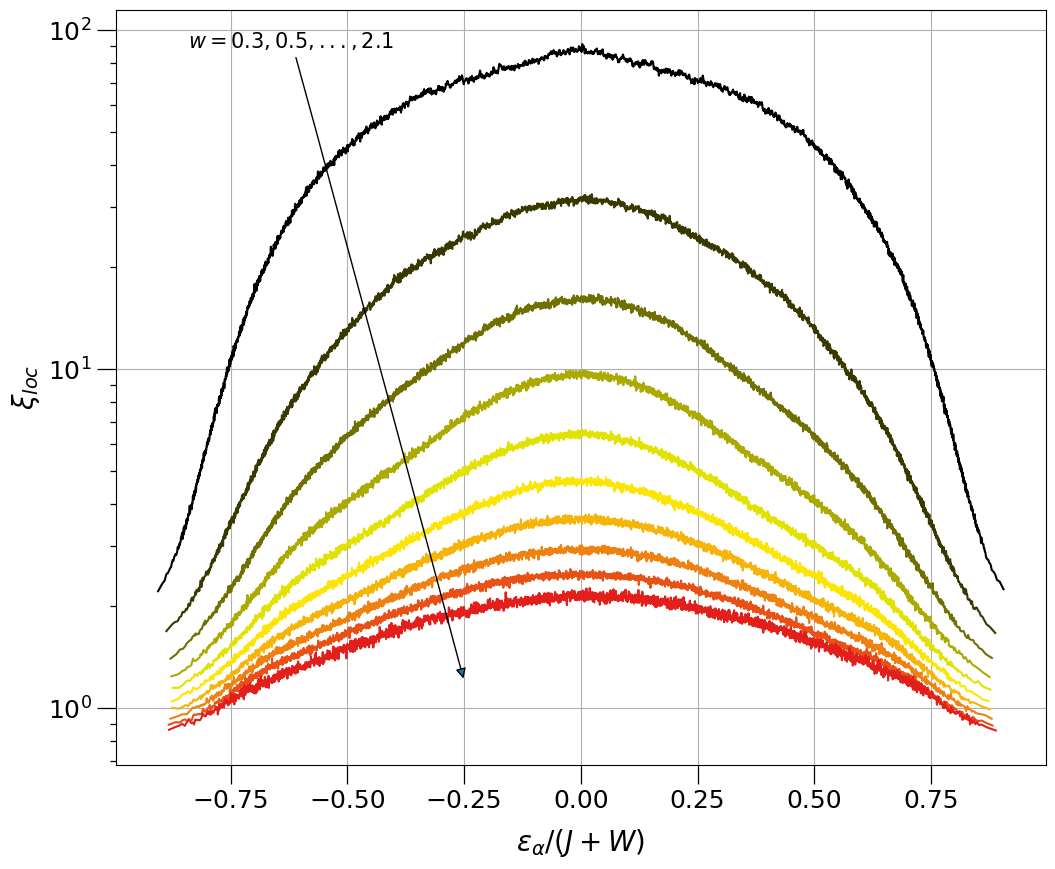

In [194]:
L=3000
dis = regspace(0.3, 2.3, 0.20)
print(dis)

plot_distribution_of_xi = 0

fig, ax = plt.subplots(figsize=(12,10), dpi = 100)
i=0
for w in dis:
    loc_len = []
    try:
        loc_len = anderson.load_loc(L, w)
    except OSError:
        a=1
        #print("File not found for %.2f"%w)
    if len(loc_len) > 0:
        if plot_distribution_of_xi: 
            hist, bins = np.histogram(np.array(loc_len[1]) / np.mean(np.array(loc_len[1])), bins=50)
            p = ax.plot(bins[0:-1], hist, marker='o', color=cmap( (w-min(dis)) / (max(dis)-min(dis))) , label=r"$w=%.2f$"%w)
        else: p = ax.plot(loc_len[0], loc_len[1], color=cmap( (w-min(dis)) / (max(dis)-min(dis))) , label=r"$w=%.2f$"%w)
        
        #ax.plot(loc_len[0], 12.0 / (w**2) * ( 1 - ( (1+w)*loc_len[0] )**2), color=p[0].get_color(), linestyle ='--', label="theoretical pred")
#ax.axhline(y=18, linestyle='--', color='black', label='L=18')
#ax.axhline(y=16, linestyle='--', color='red', label='L=16')
xlab = "\\xi_{loc} / \\langle\\xi_{loc}\\rangle_{E}" if plot_distribution_of_xi else "\\epsilon_{\\alpha}/(J+W)"
ylab = "p(\\xi_{loc}/\\langle\\xi_{loc}\\rangle_{E})" if plot_distribution_of_xi else "\\xi_{loc}"
hfun.set_plot_elements(axis=ax, xlim = (None, None), 
                                    ylim = (None, None), ylabel=ylab, xlabel=xlab, set_legend=False, font_size=18)
ax.grid()
if plot_distribution_of_xi: ax.set_yscale('linear')
else: ax.set_yscale('log')
ax.set_xscale('linear');   
#ax.set_xlim(0,2)
#ax.set_ylim(8e-3,5e2)

dw = (max(dis) - min(dis)) / (dis.size-1)
ax.annotate(r"$w=%.1f,%.1f,...,%.1f$"%(min(dis), min(dis)+dw, max(dis)), xy=(-0.25, 1.2),
            xytext=(-0.4, 100), 
            va='top', 
            ha='right',
            arrowprops={'arrowstyle': '-|>', 'connectionstyle': 'angle3,angleA=0,angleB=105'}, fontsize=15)
#ax.title.set_text(r"$H=\frac{t}{2}\sum_{\left\langle\ell,\ell'\right\rangle} \left(c^\dagger_\ell c_{\ell'} + h.c\right) + W\sum_\ell\epsilon_\ell c^\dagger_\ell c_{\ell}$"
#                             + f"\n" + r"$\epsilon_\ell\in\left[-1,1\right]\qquad L=%d,N_{dis}=200$"%L
#                             + f"\n\n" + r"$-\frac{r}{\xi_\alpha}+const=\left\langle ln\left|\sum_n \phi_n^{\alpha} \phi_{n+r}^{\alpha}\right|\right\rangle_{dis}\qquad r\in\left[0,\frac{L}{2}\right)$")
#ax.title.set_fontsize(16)

#### Distribution - rescaled by w

No handles with labels found to put in legend.


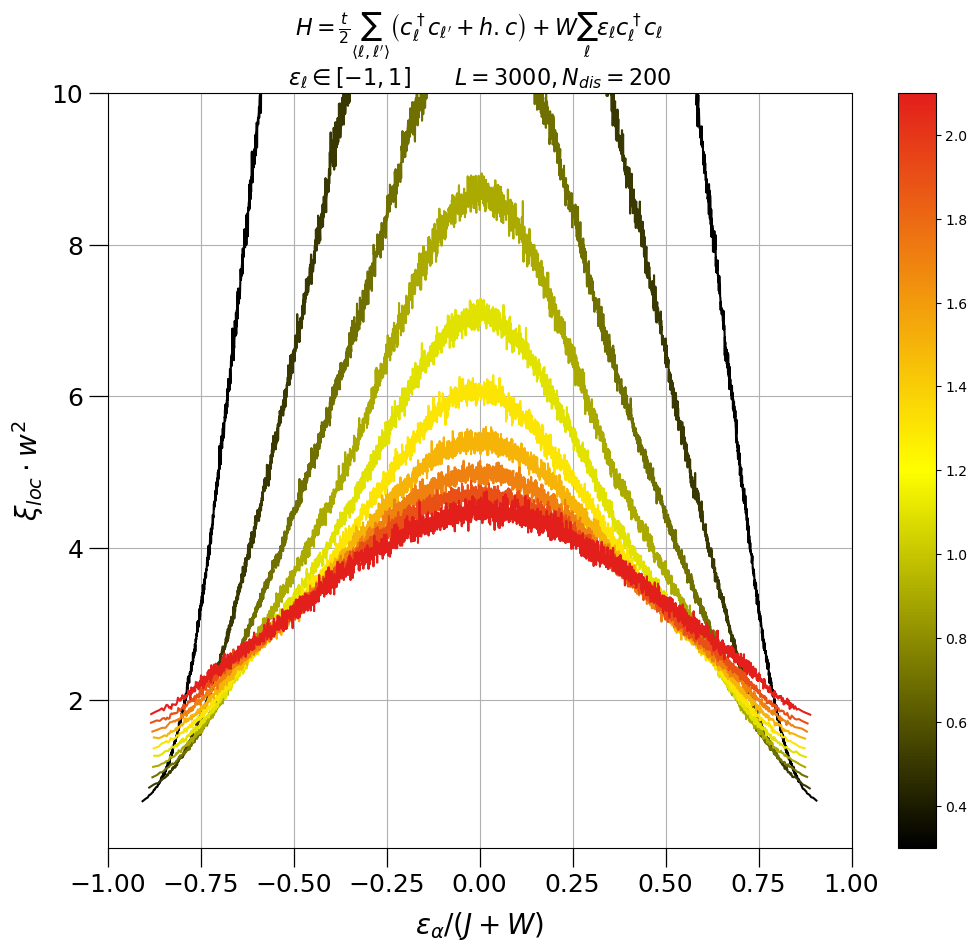

In [195]:
skip = 0
if not skip:
    fig, ax = plt.subplots(figsize=(12,10), dpi = 100)
    for w in dis:
        try:
           loc_len = anderson.load_loc(L, w)
        except OSError:
            A=1
            #print("File not found for %.2f"%w)
        if len(loc_len) > 0:
            p = ax.plot(loc_len[0], (loc_len[1]) * w**1, c=cmap((w-min(dis)) / (max(dis)-min(dis))) )
    
    hfun.set_plot_elements(axis=ax, xlim = (-1, 1), 
                                        ylim = (0, 20), ylabel="\\xi_{loc}\\cdot w^2", xlabel="\\epsilon_{\\alpha}/(J+W)", set_legend=True, font_size=18)
    ax.grid()
    ax.set_yscale('linear')
    ax.set_xscale('linear');    ax.set_xlim(-1,1)
    ax.set_ylim(5e-2,1e1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(dis), vmax=max(dis)))
    plt.colorbar(sm)
    ax.title.set_text(r"$H=\frac{t}{2}\sum_{\left\langle\ell,\ell'\right\rangle} \left(c^\dagger_\ell c_{\ell'} + h.c\right) + W\sum_\ell\epsilon_\ell c^\dagger_\ell c_{\ell}$"
                             + f"\n" + r"$\epsilon_\ell\in\left[-1,1\right]\qquad L=%d,N_{dis}=200$"%L)
    ax.title.set_fontsize(16)


### LENGTH SCALING

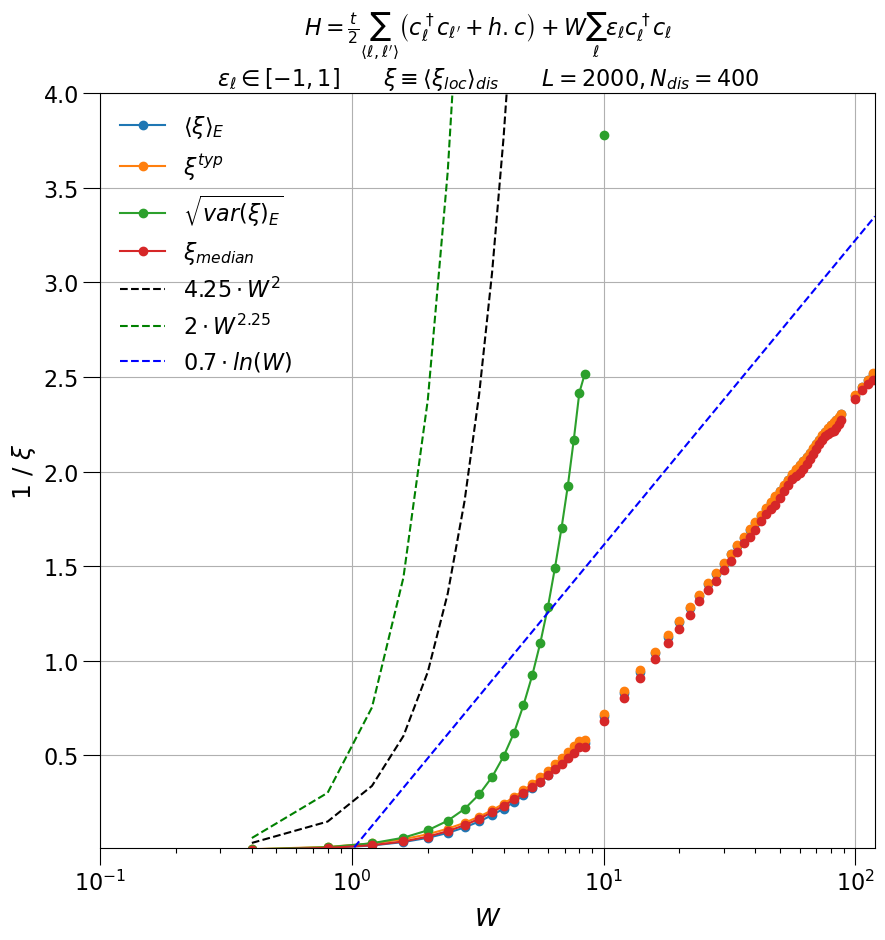

In [196]:
L=4000
#dis = np.linspace(0.1, 30.0, 300)
dis = regspace(0.1, 30., 0.1)
fig, ax = plt.subplots(figsize=(10,10), dpi = 100)
xi_mean = []
xi_typ = []
xi_var = []
xi_median = []

pick_middle_spec = 0
invert=1
num = 100

for w in dis:
    status=True
    try:
        data = anderson.load_loc(L=L, w=w)
        loc_len = data[1]
        if pick_middle_spec: 
            idx = min(range(len(data[0])), key=lambda i: abs(data[0][i] - 0.0));
            loc_len = loc_len[idx - int(num / 2) : idx + int(num / 2)]
    except OSError:
        #print("File not found for %.2f"%w)
        status=False
    if status:
        xi_mean.append(np.mean(loc_len))
        xi_var.append(np.var(loc_len))
        xi_tmp = 0
        xi_median.append(np.median(loc_len))
        for xi in loc_len:
            xi_tmp = xi_tmp + np.log(xi)
        xi_typ.append(np.exp(xi_tmp / np.float(len(loc_len))))
    else:
        xi_mean.append(np.nan)
        xi_var.append(np.nan)
        xi_typ.append(np.nan)
        xi_median.append(np.nan)
xi_mean = np.array(xi_mean)
xi_typ = np.array(xi_typ)
xi_var = np.array(xi_var)
xi_median = np.array(xi_median)
expon = -1 if invert else 1
dis = 4*dis
ax.plot(dis, (xi_mean)**(expon), marker='o', label=r"$\langle\xi\rangle_E$")
ax.plot(dis, (xi_typ)**(expon), marker='o', label=r"$\xi^{typ}$")
ax.plot(dis, (np.sqrt(xi_var))**(expon), marker='o', label=r"$\sqrt{var(\xi)_E}$")
ax.plot(dis, (xi_median)**(expon), marker='o', label=r"$\xi_{median}$")

if pick_middle_spec:
    ax.plot(dis, (4.25 / dis**2)**(expon), linestyle='--', color='black', label=r"$W^{%d}$"%(2 if invert else -2))
    ax.plot(dis, (2 / dis**2.25)**(expon), linestyle='--', color='green', label=r"$W^{%.2f}$"%(2.25 if invert else -2.25))
    ax.plot(dis, (0.65*(np.log(dis)))**(-expon), linestyle='--', color='blue', label=(r"$log(W)$" if invert else r"$log^{-1}(W)$"))
else:
    ax.plot(dis, (4.25 / dis**2)**(expon), linestyle='--', color='black', label=r"$4.25\cdot W^{%d}$"%(2 if invert else -2))
    ax.plot(dis, (2 / dis**2.25)**(expon), linestyle='--', color='green', label=r"$2\cdot W^{%.2f}$"%(2.25 if invert else -2.25))
    ax.plot(dis, (0.7*(np.log(dis)))**(-expon), linestyle='--', color='blue', label=(r"$0.7\cdot ln(W)$" if invert else r"$0.7\cdot ln^{-1}(W)$"))

ylab = "1\\ / \\ \\xi" if invert else "\\xi"
ylimits = ( (1e-2, 4e0) if invert else (1e-3, 1e4) ) if pick_middle_spec else ( (1e-2, 4e0) if invert else (1e-2, 1e3))
hfun.set_plot_elements(axis=ax, xlim = (0.1, 120.0), 
                                    ylim = ylimits, ylabel=ylab, xlabel="W", set_legend=True, font_size=16)
ax.grid()
if invert: ax.set_yscale('linear')
#ax.set_xscale('linear')
ax.title.set_text(r"$H=\frac{t}{2}\sum_{\left\langle\ell,\ell'\right\rangle} \left(c^\dagger_\ell c_{\ell'} + h.c\right) + W\sum_\ell\epsilon_\ell c^\dagger_\ell c_{\ell}$"
                             + f"\n" + r"$\epsilon_\ell\in\left[-1,1\right]\qquad\xi\equiv\langle\xi_{loc}\rangle_{dis}\qquad L=2000,N_{dis}=400$")
ax.title.set_fontsize(16)

#x = 1/0

## CORRELATION FUNCTION

[0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1]


(-50.0, 0.0)

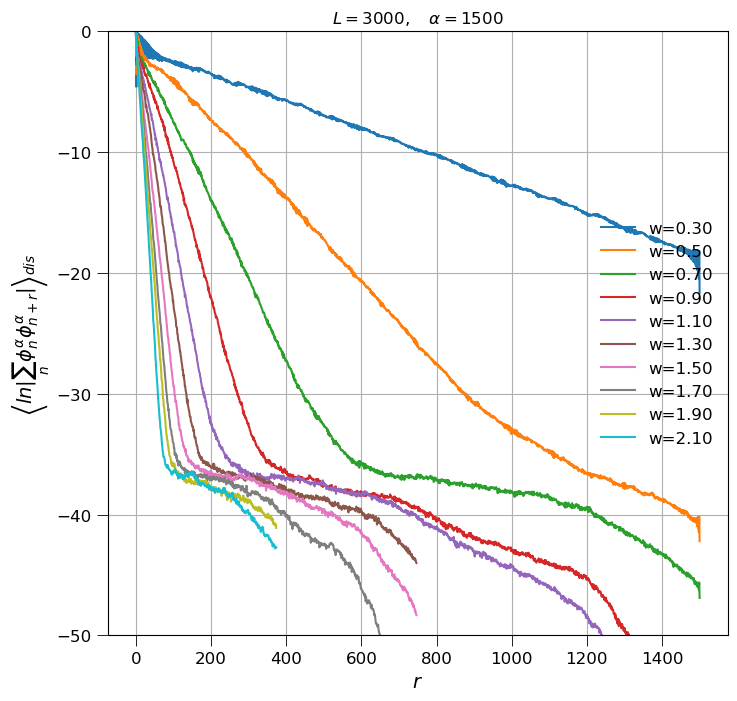

In [197]:
L=3000
dis = regspace(0.3, 2.3, 0.2)
print(dis)
fig, ax = plt.subplots(figsize=(8,8), dpi = 100)
n = L/2
for w in dis:
    orbital = []
    try:
        orbital = anderson.load_orbital(L=L, w=w, n=n)
    except OSError:
        a=1
    if len(orbital) > 0:
        p = ax.plot(orbital[0], (orbital[1]), label="w=%.2f"%(w))
        #ax.plot(loc_len[0], 96.0 / (w**2) * (1-loc_len[0]**2), color=p[0].get_color(), linestyle ='--', label="theoretical pred")
ax.legend()
ylab = "\\left\\langle ln\\left|\\sum_n \\phi_n^{\\alpha} \\phi_{n+r}^{\\alpha}\\right|\\right\\rangle_{dis}"
xlab = "r"
hfun.set_plot_elements(axis=ax, xlim = (None, None), 
                                    ylim = (None, None), ylabel=ylab, xlabel=xlab, set_legend=True, font_size=12)
ax.grid()

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.title.set_text(r"$L=%d,\quad\alpha=%d$"%(L,n))
ax.set_ylim(-50,0)

(-50.0, 0.0)

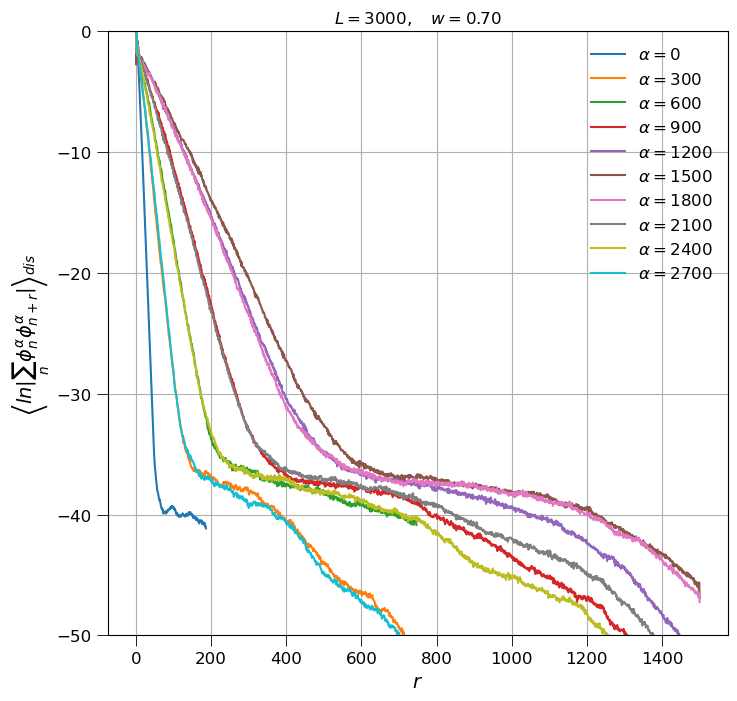

In [198]:
fig, ax = plt.subplots(figsize=(8,8), dpi = 100)
w = 0.7
#for w in dis:
for n in range(0, L, 300): 
    try:
        orbital = anderson.load_orbital(L=L, w=w, n=n)
    except OSError:
        a=1
    if len(orbital) > 0:
        p = ax.plot(orbital[0], (orbital[1]), label=r"$\alpha=%d$"%(n))
ax.legend()
ylab = "\\left\\langle ln\\left|\\sum_n \\phi_n^{\\alpha} \\phi_{n+r}^{\\alpha}\\right|\\right\\rangle_{dis}"
xlab = "r"
hfun.set_plot_elements(axis=ax, xlim = (None, None), 
                                    ylim = (None, None), ylabel=ylab, xlabel=xlab, set_legend=True, font_size=12)
ax.grid()

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.title.set_text(r"$L=%d,\quadw=%.2f$"%(L, w))
ax.set_ylim(-50,0)

# SPECTRAL FORM FACTOR

In [199]:


def xover(input_array, cut):
    x = input_array > cut
    return x.argmin() if x.any() else -1

[0.05681567655901396, 0.05996868122973248, 0.05878728955226559, 0.058190833066406225]


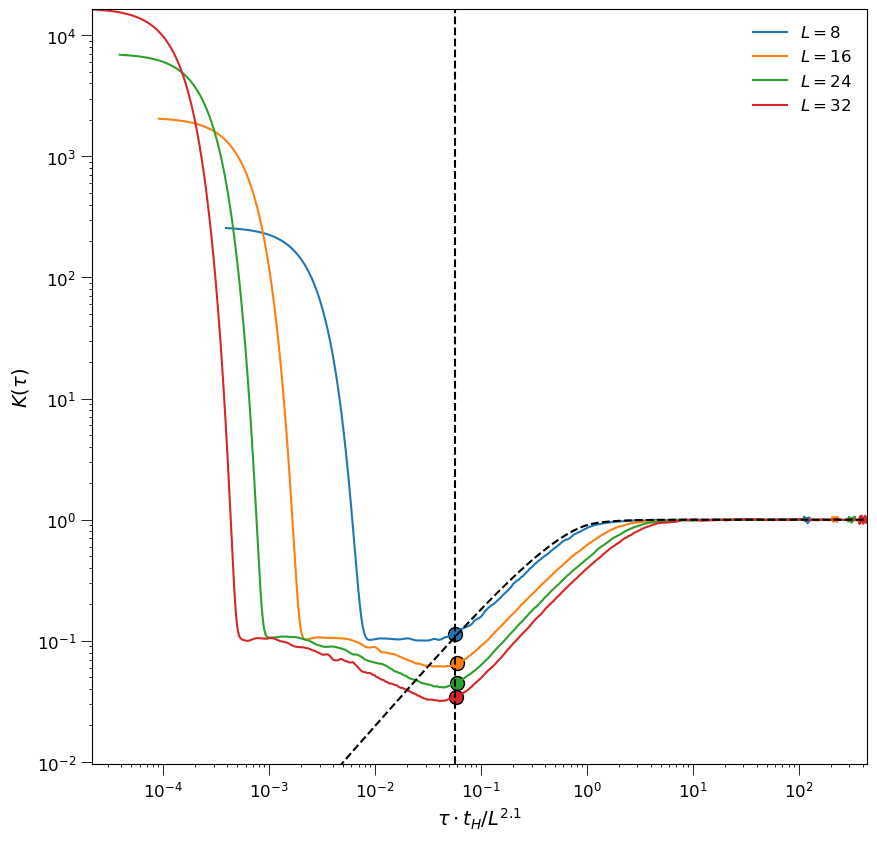

In [200]:
reload_modules()
cf.set_params(_L=32)
W0=0.1
Wend = 1.0
dW = 0.1

L0=8
Lend=32
dL=8
func_x = lambda x, a: x * a**(0.0 - 1.6)

ZOOM_IN = 0
L=32
W=2.5

vals = []
if user_settings['scaling_idx'] == 0:
    vals = range(L0, Lend + dL, dL)
else :
    for x in range(0, int((Wend-W0) / dW) + 1):
        vals.append(W0 + x * dW)

plot_deviation = 0
eps = 1.2e-1

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi = 100)

y_min = 1.0e10;     y_max = -1.0e10;
x_min = 1.0e10;     x_max = -1.0e10;
tH = []
thouless_time = []
gap_ratio = []
timee = []

for x in vals:
    Ltmp = x if user_settings['scaling_idx'] == 0 else L
    Wtmp = W if user_settings['scaling_idx'] == 0 else x
    status, times, sff, tH_tmp, tau, r = anderson.load_sff(L=Ltmp, W = Wtmp)
    if status:
        sff_dev = np.abs(np.log10(sff / hfun.sff_GOE(times)))
        times = func_x(times, x) * tH_tmp
        if plot_deviation: sff = sff_dev
        #if user_settings['scaling_idx'] == 0:   sff = x * sff
        
        p = axis.plot(times, sff, label=hfun.key_title(x, user_settings))
        tH.append(tH_tmp)
        gap_ratio.append(r)
        timee = times
        if plot_deviation == False:
            tau = times[xover(sff_dev, eps)]
            thouless_time.append(tau)
            idx = min(range(len(times)), key=lambda i: abs(times[i] - tau));
            axis.scatter(tau, sff[idx], marker='o', facecolors=None, edgecolors='black', s=100)

        #-- xy-ranges
        mini = sff.min();  maxi = sff.max();
        if mini < y_min and np.isfinite(mini): y_min = mini
        if maxi > y_max and np.isfinite(maxi): y_max = maxi
        mini = times.min();  maxi = times.max();
        if mini < x_min and np.isfinite(mini): x_min = mini
        if maxi > x_max and np.isfinite(maxi): x_max = maxi
    else:
        thouless_time.append(np.nan)
        tH.append(np.nan)
        gap_ratio.append(np.nan)

print(thouless_time)
hfun.set_plot_elements(axis = axis, xlim = (x_min, x_max), ylim = (0.3*y_min, y_max), 
                                    xlabel = '\\tau \\cdot t_H / L^{2.1}', ylabel = 'K(\\tau)',
                                    settings=user_settings, font_size=12, set_legend=True)
if ZOOM_IN:
    axis.set_yscale('linear')
    axis.set_ylim(0, 5.1)
if not plot_deviation: axis.axvline(x=min(thouless_time), ls='--', color='black')

if plot_deviation: axis.axhline(y=eps, ls='--', color='black')
else: axis.plot(timee, hfun.sff_GOE(timee), label='GOE', linestyle='--', color='black')

(0.7, 1000.0)

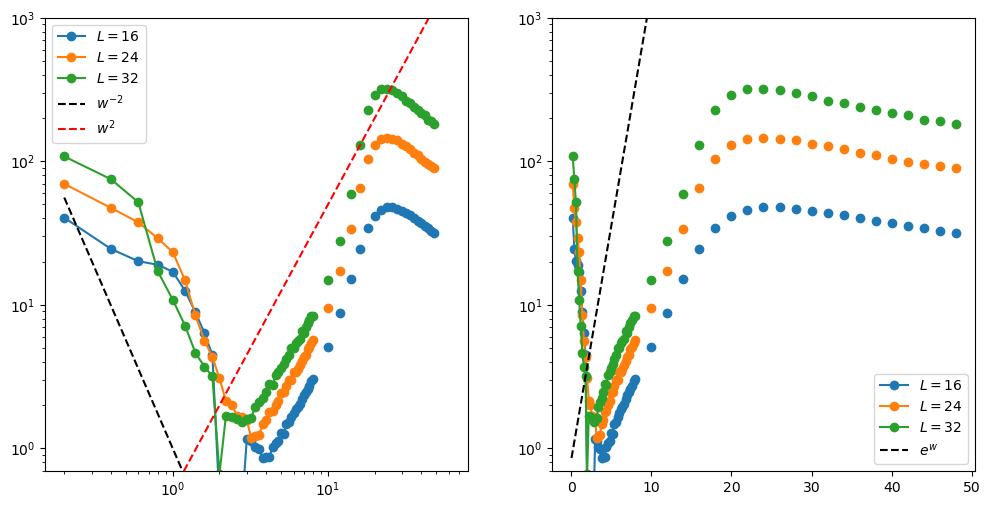

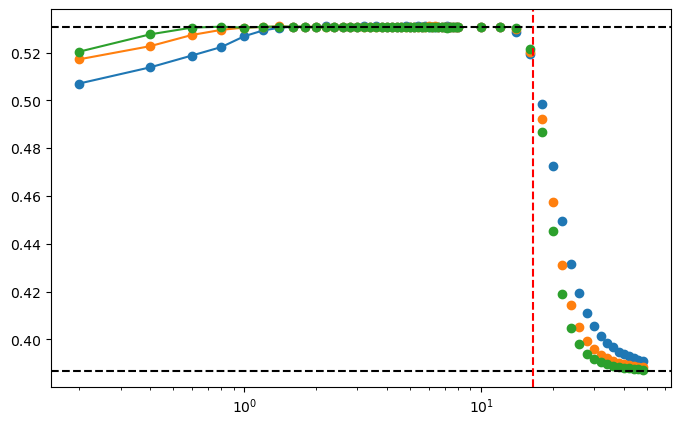

In [201]:
from cmath import nan


W0=0.05
Wend = 15.0
dW = 0.05

func_x = lambda x, a: x #* a**2
vals = []

for x in range(0, int((Wend-W0) / dW) + 1) :
    vals.append(W0 + x * dW)
vals = np.array(vals)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi = 100)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(8,5), dpi = 100)

aa = 4 * vals
for L in range(16,40,8):
    cf.set_params(_L=L)
    importlib.reload(cf)
    tH = []
    thouless_time = []
    gap_ratio = []
    timee = []
    for x in vals:
        status, times, sff, tH_tmp, tau, r = anderson.load_sff(L=L, W = x)
        sff_dev = np.abs(np.log10(sff / hfun.sff_GOE(times)))
        
        idx = xover(sff_dev, eps)
        if idx > 0: 
            tau = times[idx] * tH_tmp
        else: 
            tau = nan

        thouless_time.append(tau)
        tH.append(tH_tmp)
        gap_ratio.append(r)

    ax1.plot(aa, thouless_time, label=r"$L=%d$"%L, marker='o')
    ax2.plot(aa, thouless_time, label=r"$L=%d$"%L, marker='o')
    axis.plot(aa, gap_ratio, label=r"$L=%d$"%L, marker='o')
ax1.plot(aa, 1e0/aa**2.5, linestyle='--', color='black', label=r"$w^{-2}$")
ax1.plot(aa, 5e-1*aa**2.0, linestyle='--', color='red', label=r"$w^{2}$")

axis.axhline(y=0.5307, ls='--', color='black')
axis.axhline(y=0.3867, ls='--', color='black')
axis.axvline(x=16.54, ls='--', color='red')
axis.set_xscale('log')

b=0.75;  ax2.plot(vals, 1.75 / np.exp(1*b) * np.exp(b*vals), linestyle='--', color='black', label=r"$e^{w}$")

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xscale('log')
ax1.legend()
ax2.legend()
ax1.set_ylim(7e-1,1e3)
ax2.set_ylim(7e-1,1e3)

# SPECTRA

### LEVEL SPACING STATISTICS

### DENSITY OF STATES

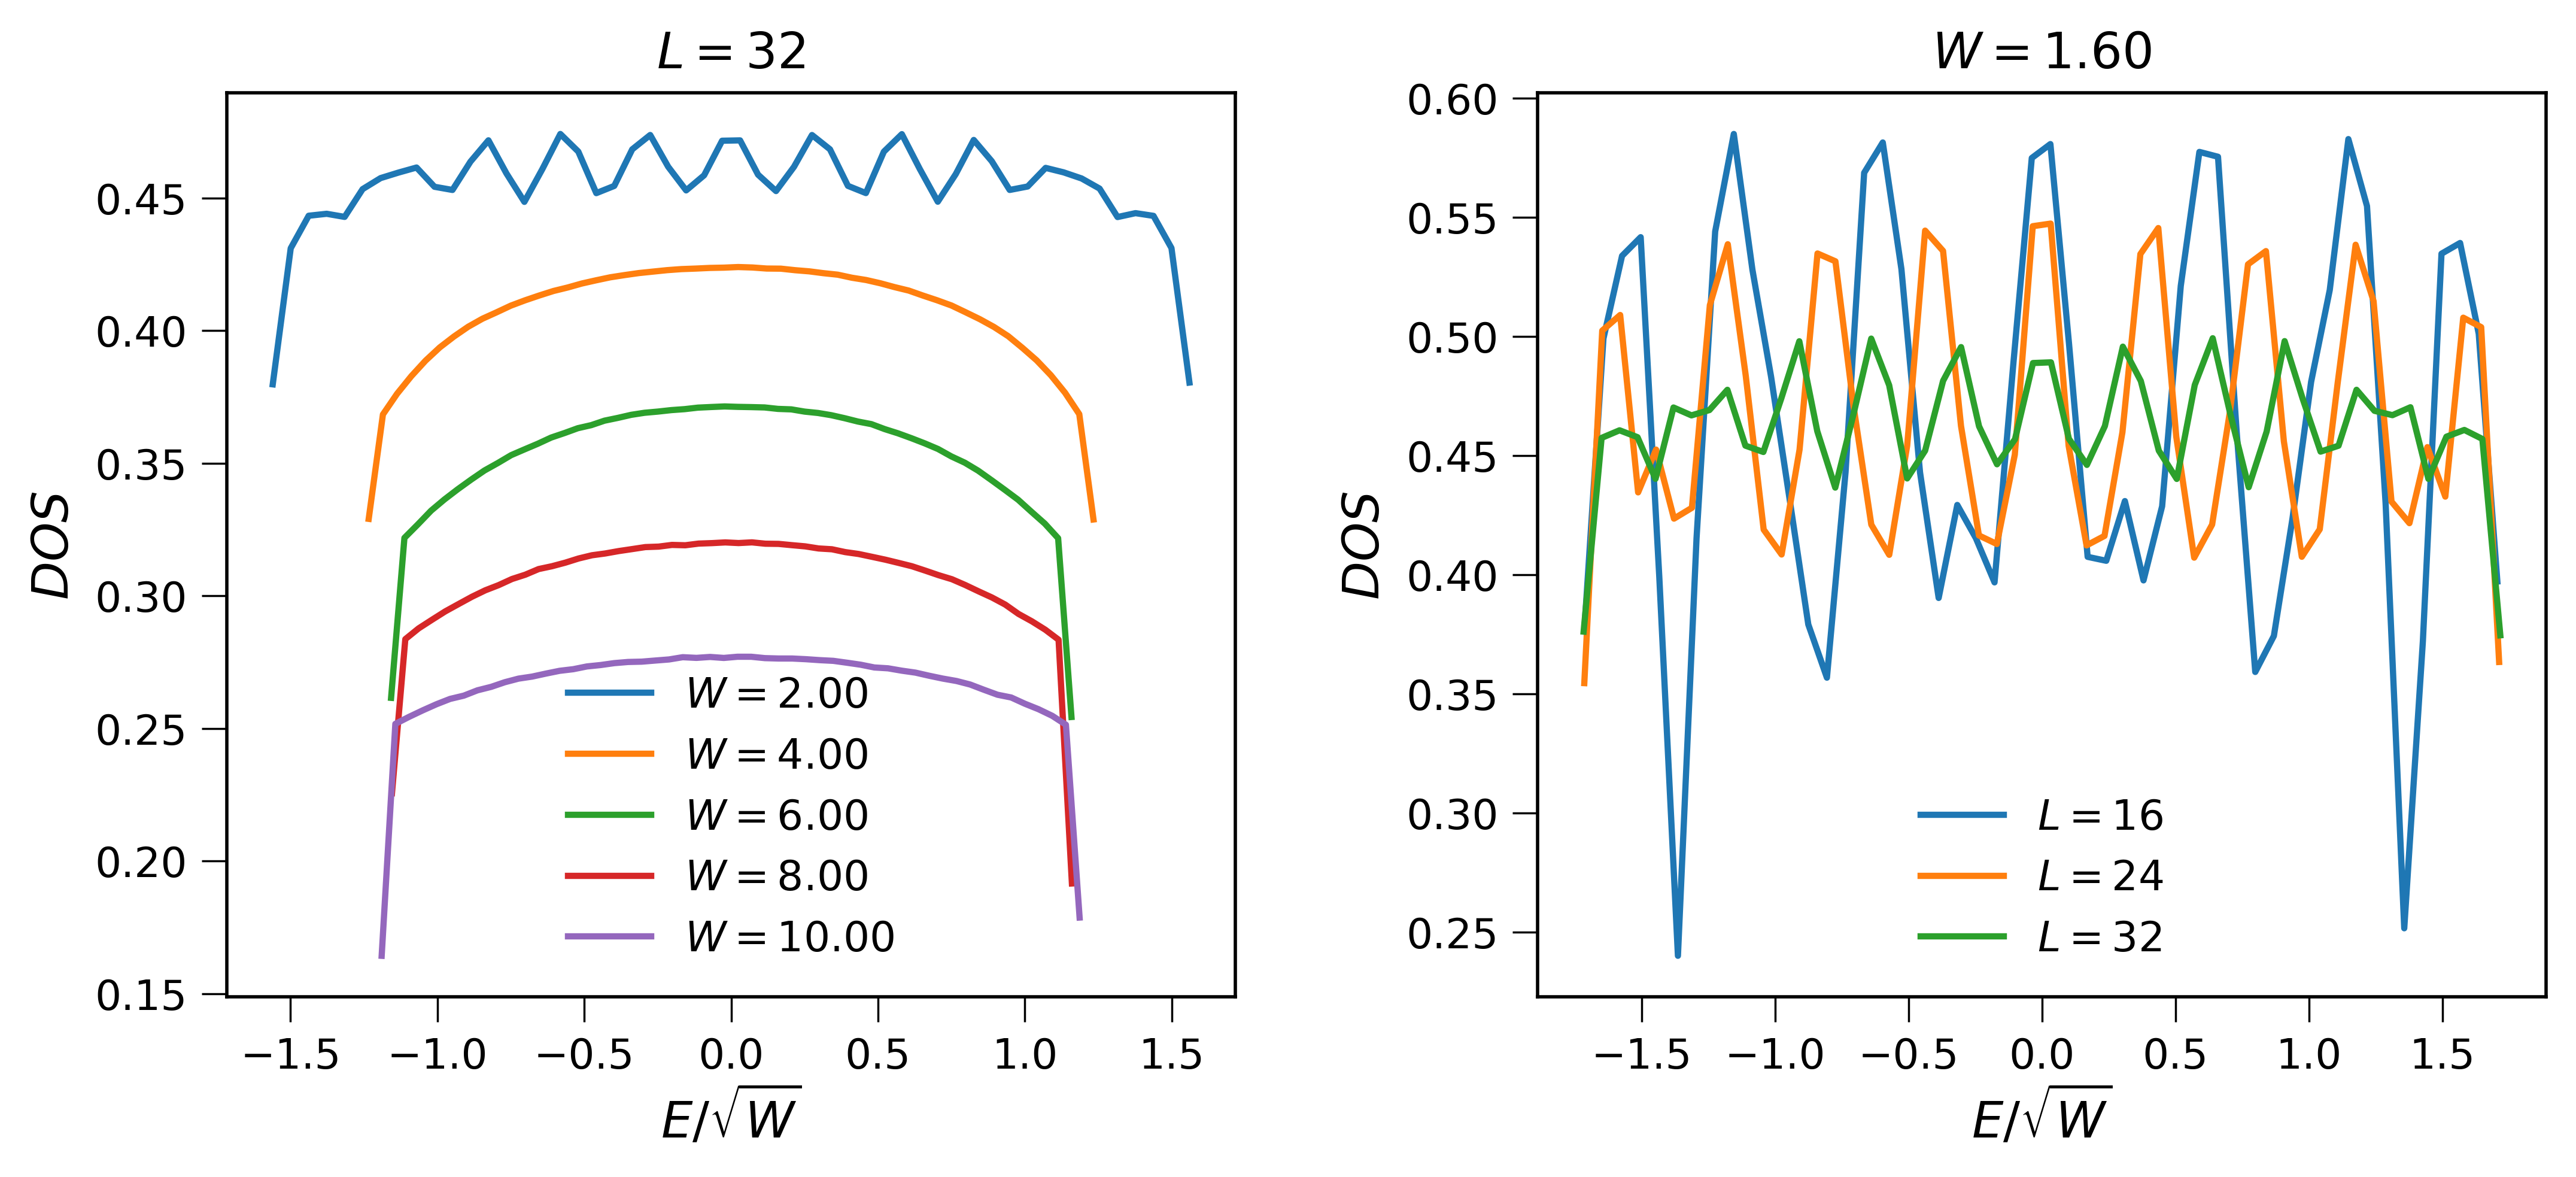

In [294]:
dis = regspace(0.0, 3, 0.5)
fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, figsize=(10,4), dpi = 500)
L=32
W=1.50
for W in dis:
    status, E, DOS = anderson.load_DOS(L=L, W=W, use_500_states=False, unfolded=False)
    if status:
        E /= np.sqrt(W)
        #DOS /= max(DOS)
        ax1.plot(E, DOS, label=r"$W=%.2f$"%(4*W))

hfun.set_plot_elements(axis=ax1, xlim = (None, None), ylim = (None, None), 
                                ylabel="DOS", xlabel="E / \\sqrt{W}", set_legend=True, font_size=10)
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_title(r"$L=%d$"%L)

W=0.4
for L in range(8, 40, 8):
    status, E, DOS = anderson.load_DOS(L=L, W=W, use_500_states=False, unfolded=False)
    if status:
        E /= np.sqrt(W)
        #DOS /= max(DOS)
        ax2.plot(E, DOS, label=r"$L=%d$"%(L))

hfun.set_plot_elements(axis=ax2, xlim = (None, None), ylim = (None, None), 
                                ylabel="DOS", xlabel="E / \\sqrt{W}", set_legend=True, font_size=10)
ax2.set_xscale('linear')
ax2.set_yscale('linear')
ax2.set_title(r"$W=%.2f$"%(4*W))
fig.subplots_adjust(wspace=0.3, hspace=0.5)

## MEAN LEVEL SPACING

0 12
0 12
0 12
0 12
0 12
0 12


(0.15206155719066636, 50)

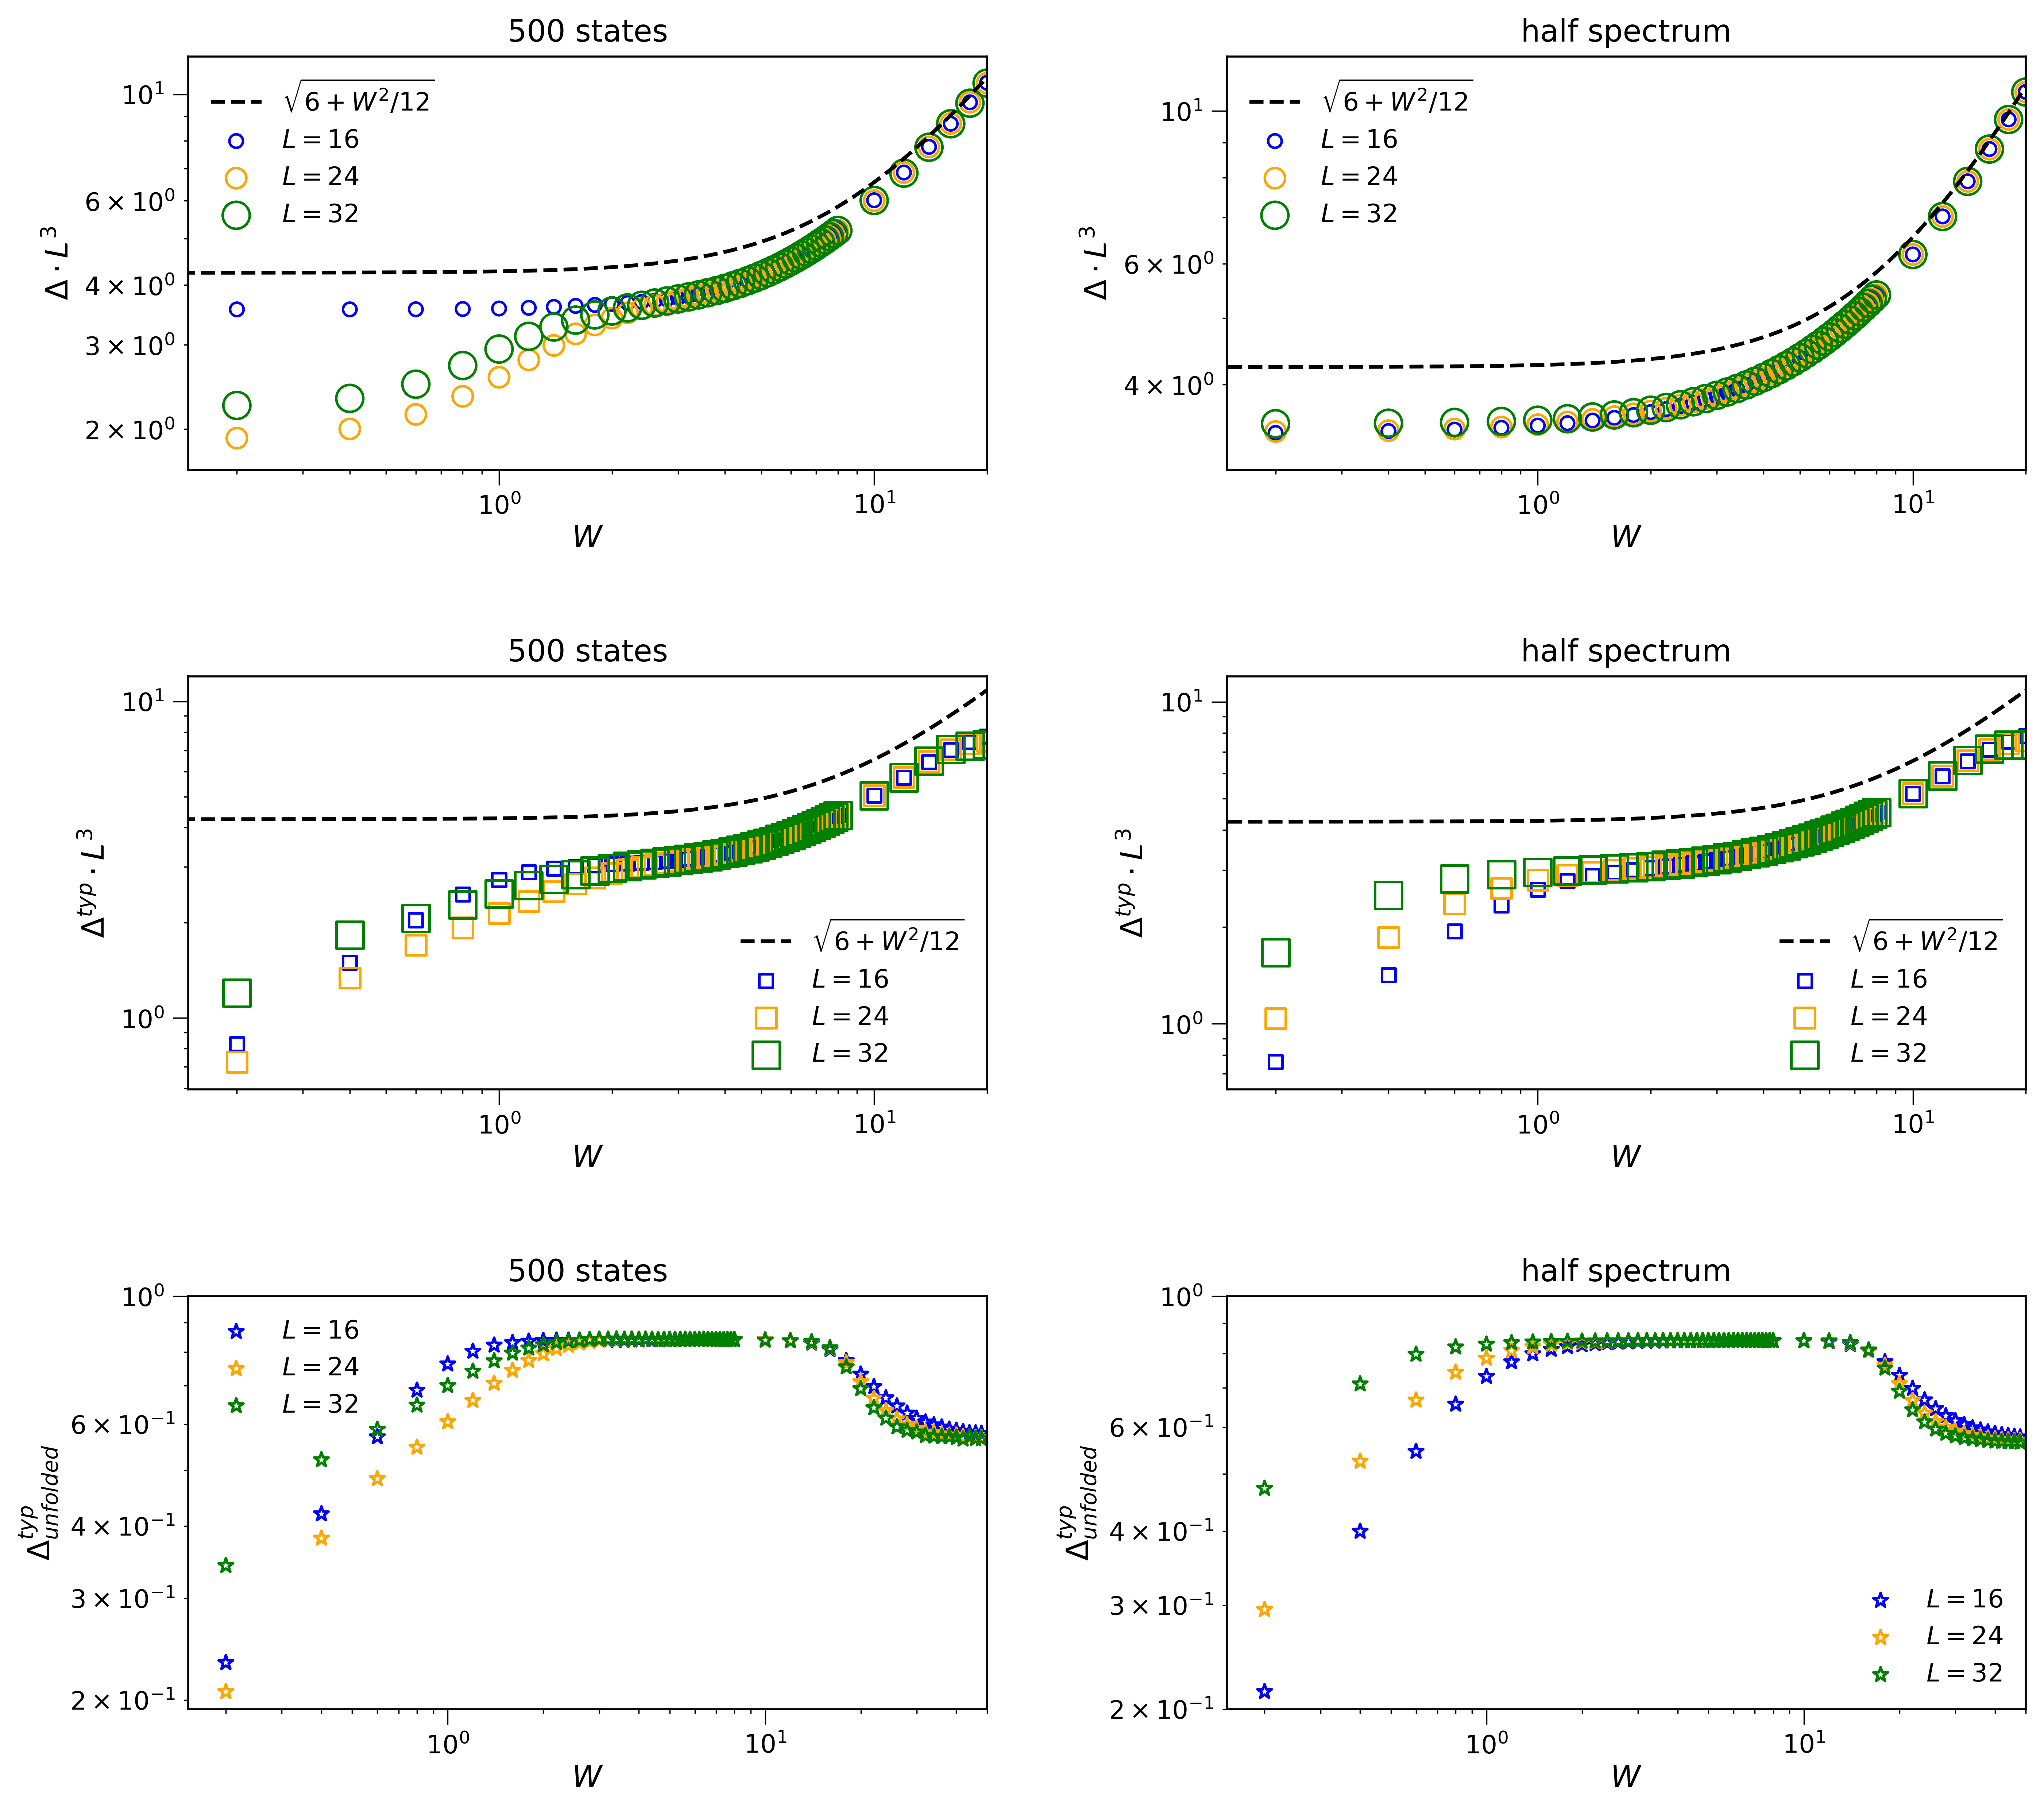

In [300]:
reload_modules()

dis = regspace(0.0, 20, 0.05)
dis_plot = 4 * dis

def get_min_max(data : np.array, min_prev : int, max_prev : int):
    new_min = 0
    new_max = 12
    if min(data) < min_prev: 
        new_min = min(data)
    if max(data) > max_prev: 
        new_max = max(data)
    
    return new_min, new_max
colors = ['gray', 'blue', 'orange', 'green', 'red']
def plot_mean_spacing(axis, which = 0, use_500_states=False):
    my_min = 1e10
    my_max = 1e-10
    for L in range(16, 40, 8):
        wH = []
        wH_typ = []
        wH_typ_unfolded = []
        for W in dis:
            status, r, dist_r, wH_typ_unfolded_tmp, wH_tmp, wH_typ_tmp = anderson.load_level_spacing_dist(L=L, W=W, log_data=False, use_500_states=use_500_states)

            if status:
                wH.append(wH_tmp)
                wH_typ.append(wH_typ_tmp)
                wH_typ_unfolded.append(wH_typ_unfolded_tmp)
            else:
                wH.append(np.nan)
                wH_typ.append(np.nan)
                wH_typ_unfolded.append(np.nan)
        wH = np.array(wH) * L**3
        wH_typ = np.array(wH_typ) * L**3
        wH_typ_unfolded = np.array(wH_typ_unfolded)
        xlab = "W"
        ylab = ""
        if which == 0:      
            axis.scatter(dis_plot, wH, marker='o', s=(L/3)**2, facecolor='None', edgecolors=colors[int(L/8 - 1)], label=r"$L=%d$"%L)
            ylab="\\Delta\\cdot L^3"
            my_min, my_max = get_min_max(data=wH, min_prev=my_min, max_prev=my_max)
            print(my_min, my_max)
        elif which == 1:    
            axis.scatter(dis_plot, wH_typ, marker='s', s=(L/3)**2, facecolor='None', edgecolors=colors[int(L/8 - 1)], label=r"$L=%d$"%L)
            ylab="\\Delta^{typ}\\cdot L^3"
            my_min, my_max = get_min_max(wH_typ, my_min, my_max)
        else:               
            axis.scatter(dis_plot, wH_typ_unfolded, marker='*', facecolor='None', edgecolors=colors[int(L/8 - 1)], label=r"$L=%d$"%L)
            ylab="\\Delta_{unfolded}^{typ}"
            my_min, my_max = get_min_max(wH_typ_unfolded, my_min, my_max)

    axis.title.set_text("500 states" if use_500_states else "half spectrum")    
    if which == 0 or which == 1:  
        axis.plot(dis_plot, np.sqrt(3) * np.sqrt(6 + dis_plot**2 / 12.), linestyle='--', color='black', label=r"$\sqrt{6+W^2/12}$")

    hfun.set_plot_elements(axis=axis, xlim = (None, None), ylim = (None, None), 
                                ylabel=ylab, xlabel=xlab, set_legend=True, font_size=10)
    axis.set_ylim(my_min, my_max)
    axis.set_xlim(0, 20)

    #axis.set_xscale('linear')
    #axis.set_yscale('linear')


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots( nrows=3, ncols=2, figsize=(13,12), dpi = 500)
fig.subplots_adjust(wspace=0.3, hspace=0.5)

plot_mean_spacing(axis=ax1, which=0, use_500_states=True)
plot_mean_spacing(axis=ax2, which=0, use_500_states=False)
plot_mean_spacing(axis=ax3, which=1, use_500_states=True)
plot_mean_spacing(axis=ax4, which=1, use_500_states=False)
plot_mean_spacing(axis=ax5, which=2, use_500_states=True)
plot_mean_spacing(axis=ax6, which=2, use_500_states=False)
ax5.set_ylim(0,1)
ax6.set_ylim(0,1)
ax5.set_xlim(0,50)
ax6.set_xlim(0,50)